In [ ]:
# Download cats and dogs dataset from:
# https://www.microsoft.com/en-us/download/details.aspx?id=54765

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

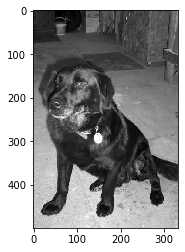

In [7]:
DATADIR = "/Users/harnooroberai/Data_Science/Datasets/kagglecatsanddogs_3367a/PetImages"
CATEGORIES = ["Dog","Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category) # path to cats or dogs dir
#     print(path)
    for img in os.listdir(path):
        imag_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(imag_array, cmap ="gray")
        plt.show()
#         to check if our imag is working
        break
    break

In [8]:
print(imag_array.shape)

(500, 333)


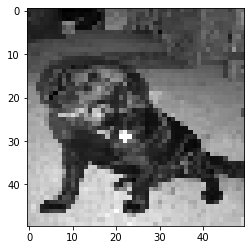

In [9]:
# TO normalize every image 
IMG_SIZE = 50 

new_array = cv2.resize(imag_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

In [10]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category) # path to cats or dogs dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                imag_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(imag_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
        
create_training_data()

In [11]:
print(len(training_data))

24946


In [12]:
# Shuffle your data so the neural netwotk is more effiecnt
# Now we are first inputing all dogs image and then cata images
# If this is the case the NN will start predicting dogs and after 50% image
# starts predicting cats images

# unshuffled data
for sample in training_data[:10]:
    print(sample[1])


0
0
0
0
0
0
0
0
0
0


In [13]:
import random 

random.shuffle(training_data)

In [14]:
# shuffled data
for sample in training_data[:10]:
    print(sample[1])

1
1
0
1
1
1
1
0
0
1


In [15]:
X = []
y = []

In [16]:
for feature, label in training_data:
    X.append(feature)
    y.append(label)

X = np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE, 1)

In [17]:
X.shape

(24946, 50, 50, 1)

In [18]:
# SAVING YOUR DATASET
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [19]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [44]:
# X[1]